# Data Preparation

In [1]:
import numpy as np
import pandas as pd
from scipy import fftpack
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_raw = pd.read_csv('center_sternum.txt', sep="\t")
print(data_raw.shape)

(16506, 16)


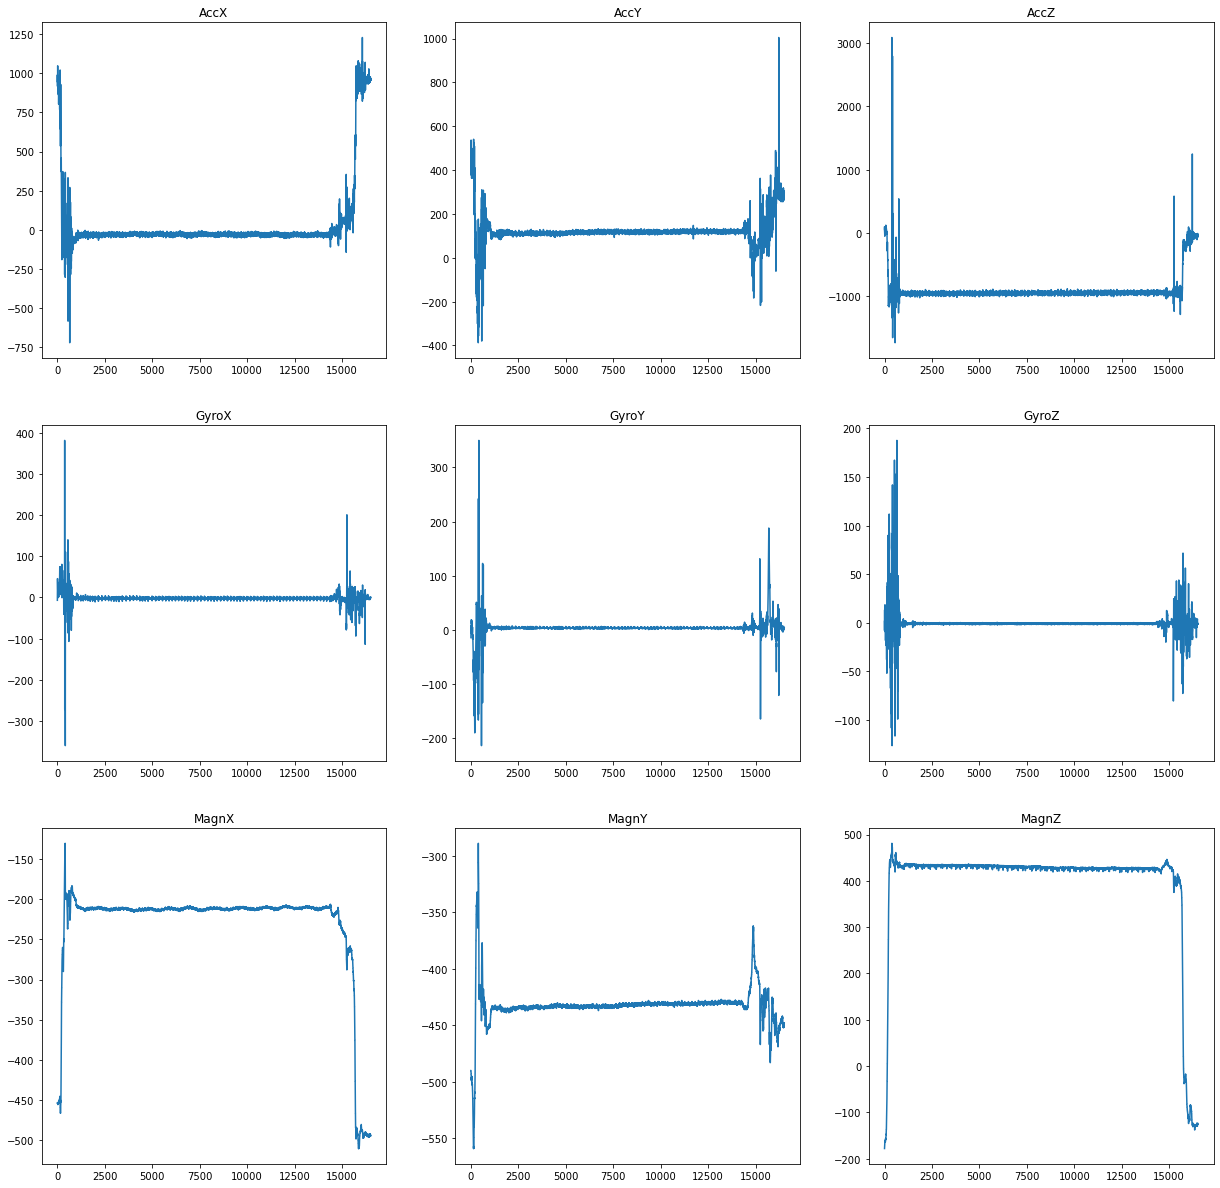

In [3]:
fig, ax = plt.subplots(3,3,figsize=(21,21))

ax[0,0].plot(data_raw['AccX'])
ax[0,0].set_title('AccX')
# ax[0].xaxis.set_major_locator(plt.MultipleLocator(500))
# ax[0].tick_params(axis='x',labelrotation=90)
ax[0,1].plot(data_raw['AccY'])
ax[0,1].set_title('AccY')
ax[0,2].plot(data_raw['AccZ'])
ax[0,2].set_title('AccZ')

ax[1,0].plot(data_raw['GyroX'])
ax[1,0].set_title('GyroX')
ax[1,1].plot(data_raw['GyroY'])
ax[1,1].set_title('GyroY')
ax[1,2].plot(data_raw['GyroZ'])
ax[1,2].set_title('GyroZ')

ax[2,0].plot(data_raw['MagnX'])
ax[2,0].set_title('MagnX')
ax[2,1].plot(data_raw['MagnY'])
ax[2,1].set_title('MagnY')
ax[2,2].plot(data_raw['MagnZ'])
_=ax[2,2].set_title('MagnZ')

There are 76 different timestamps


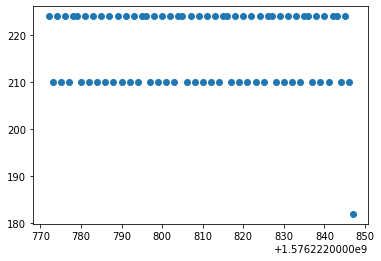

In [4]:
# understanding how timesteps work
tstamp_uniq_numbers = data_raw['Timestamp'].value_counts()
print(f'There are {len(tstamp_uniq_numbers)} different timestamps')
_=plt.scatter(tstamp_uniq_numbers.index, tstamp_uniq_numbers.values)

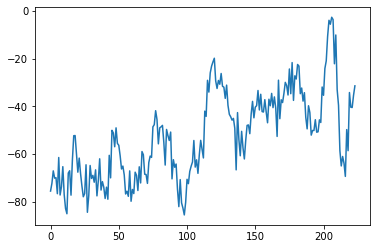

In [5]:
# how does data look like within each timestamp?
plt.plot(range(len(data_raw[data_raw['Timestamp'] == tstamp_uniq_numbers.index[27]])), data_raw[data_raw['Timestamp'] == tstamp_uniq_numbers.index[27]]['AccX'])

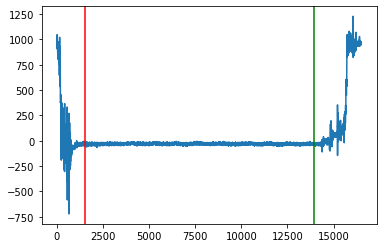

In [6]:
# reorder the timestamps and their corresponding length
sorted_timestamps = np.sort(tstamp_uniq_numbers.index)
sorted_timestamps_length = tstamp_uniq_numbers.values[np.argsort(tstamp_uniq_numbers.index)]
sorted_timestamps_valcount = pd.Series(data=sorted_timestamps_length, index=sorted_timestamps)

# extract the last index corresponding to the last timestep considered 
timestep1_num = 6
timestep2_num = 63
index1 = np.max(data_raw[data_raw['Timestamp'] <= sorted_timestamps[timestep1_num]].index)
index2 = np.max(data_raw[data_raw['Timestamp'] <= sorted_timestamps[timestep2_num]].index)
plt.plot(data_raw['AccX'])
plt.axvline(index1, color='r')
_=plt.axvline(index2, color='g')

In [7]:
# fig, ax = plt.subplots(3,3,figsize=(21,21))

# ax[0,0].plot(data_raw['AccX'])
# ax[0,0].set_title('AccX')
# # ax[0].xaxis.set_major_locator(plt.MultipleLocator(500))
# # ax[0].tick_params(axis='x',labelrotation=90)
# ax[0,0].axvline(x=index1, color='r')
# ax[0,1].plot(data_raw['AccY'])
# ax[0,1].set_title('AccY')
# ax[0,1].axvline(x=index1, color='r')
# ax[0,2].plot(data_raw['AccZ'])
# ax[0,2].set_title('AccZ')
# ax[0,2].axvline(x=index1, color='r')

# ax[1,0].plot(data_raw['GyroX'])
# ax[1,0].set_title('GyroX')
# ax[1,0].axvline(x=index1, color='r')
# ax[1,1].plot(data_raw['GyroY'])
# ax[1,1].set_title('GyroY')
# ax[1,1].axvline(x=index1, color='r')
# ax[1,2].plot(data_raw['GyroZ'])
# ax[1,2].set_title('GyroZ')
# ax[1,2].axvline(x=index1, color='r')

# ax[2,0].plot(data_raw['MagnX'])
# ax[2,0].set_title('MagnX')
# ax[2,0].axvline(x=index1, color='r')
# ax[2,1].plot(data_raw['MagnY'])
# ax[2,1].set_title('MagnY')
# ax[2,1].axvline(x=index1, color='r')
# ax[2,2].plot(data_raw['MagnZ'])
# ax[2,2].set_title('MagnZ')
# _=ax[2,2].axvline(x=index1, color='r')

In [8]:
# create dataset with time
time = []
prev_time = 0
for tstamp_len in sorted_timestamps_valcount:
    for i in range(tstamp_len):
        temp = 1. / tstamp_len
        time.append(temp + prev_time)
        prev_time += temp
time = np.array(time)
time = time - (1. / sorted_timestamps_length[0])
print(time.shape)

data_raw['Time'] = time

(16506,)


In [9]:
# fig, ax = plt.subplots(3,3,figsize=(21,21))

# ax[0,0].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['AccX'])
# ax[0,0].set_title('AccX')
# # ax[0].xaxis.set_major_locator(plt.MultipleLocator(500))
# # ax[0].tick_params(axis='x',labelrotation=90)
# ax[0,1].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['AccY'])
# ax[0,1].set_title('AccY')
# ax[0,2].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['AccZ'])
# ax[0,2].set_title('AccZ')

# ax[1,0].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['GyroX'])
# ax[1,0].set_title('GyroX')
# ax[1,1].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['GyroY'])
# ax[1,1].set_title('GyroY')
# ax[1,2].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['GyroZ'])
# ax[1,2].set_title('GyroZ')

# ax[2,0].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['MagnX'])
# ax[2,0].set_title('MagnX')
# ax[2,1].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['MagnY'])
# ax[2,1].set_title('MagnY')
# ax[2,2].plot(data_raw.loc[:index1]['Time'], data_raw.loc[:index1]['MagnZ'])
# _=ax[2,2].set_title('MagnZ')

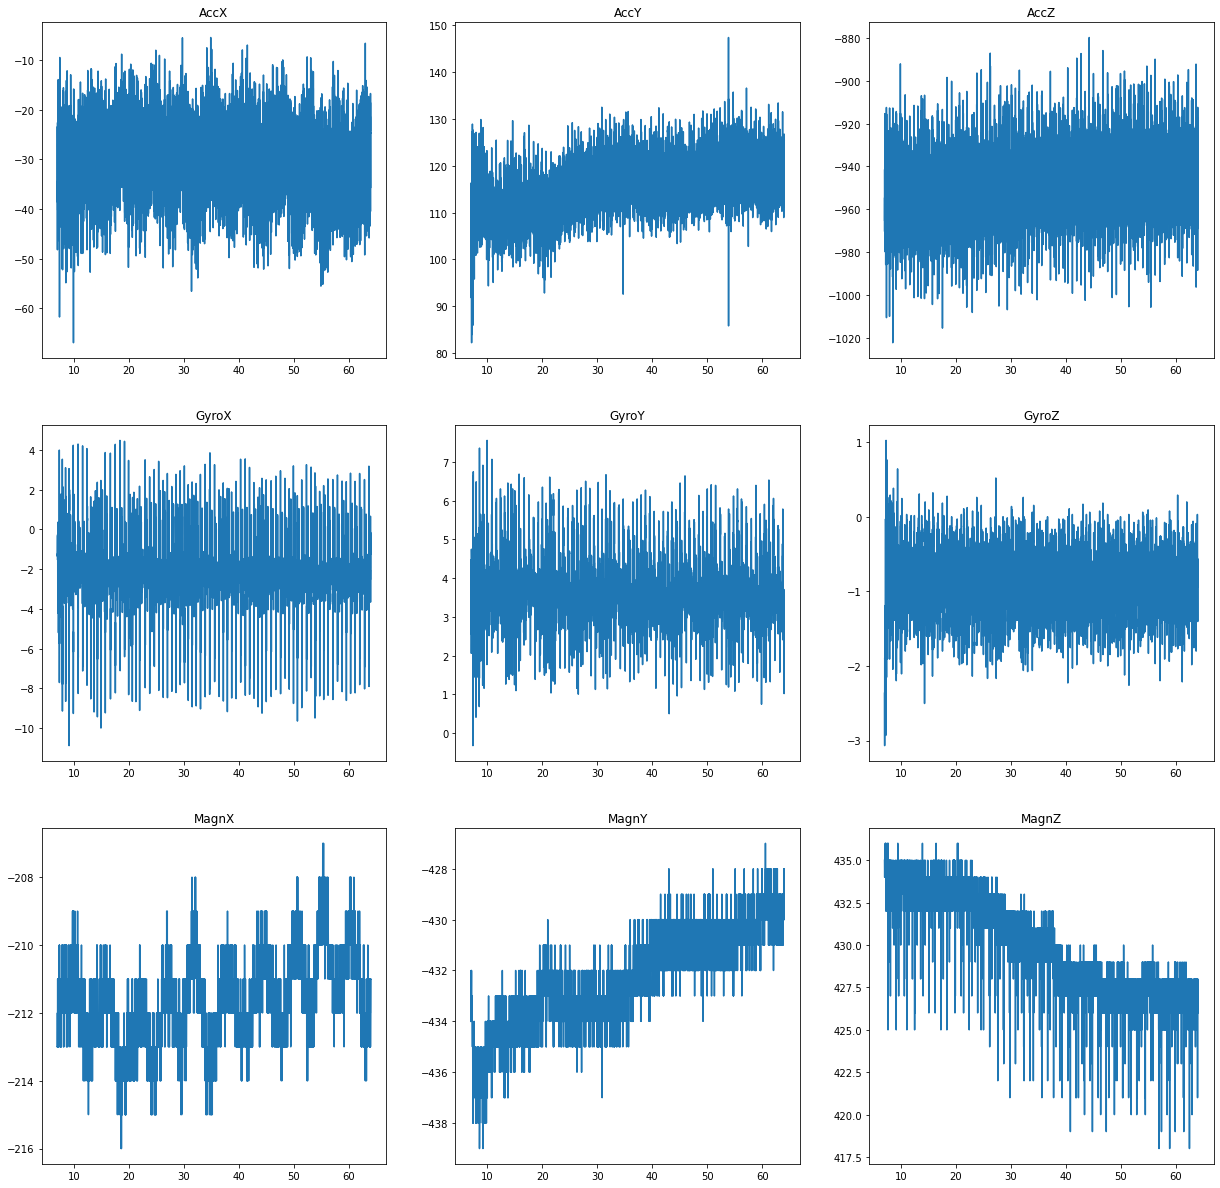

In [10]:
fig, ax = plt.subplots(3,3,figsize=(21,21))

ax[0,0].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['AccX'])
ax[0,0].set_title('AccX')
# ax[0].xaxis.set_major_locator(plt.MultipleLocator(500))
# ax[0].tick_params(axis='x',labelrotation=90)
ax[0,1].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['AccY'])
ax[0,1].set_title('AccY')
ax[0,2].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['AccZ'])
ax[0,2].set_title('AccZ')

ax[1,0].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['GyroX'])
ax[1,0].set_title('GyroX')
ax[1,1].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['GyroY'])
ax[1,1].set_title('GyroY')
ax[1,2].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['GyroZ'])
ax[1,2].set_title('GyroZ')

ax[2,0].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['MagnX'])
ax[2,0].set_title('MagnX')
ax[2,1].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['MagnY'])
ax[2,1].set_title('MagnY')
ax[2,2].plot(data_raw.loc[index1:index2]['Time'], data_raw.loc[index1:index2]['MagnZ'])
_=ax[2,2].set_title('MagnZ')

(3, 12405)
[ 9.64857427 13.94892332 76.40250241]
[[-0.23466006 -0.93286694 -0.27330188]
 [ 0.07844473  0.26206265 -0.96185737]
 [ 0.96890716 -0.2471486   0.01168286]]
(12405,)


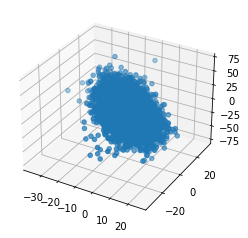

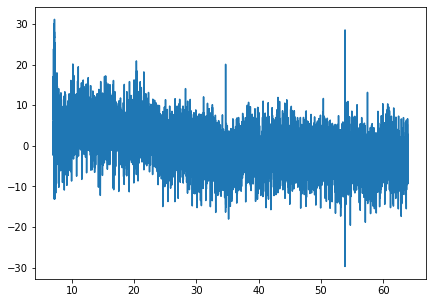

In [21]:
# perform PCA wrt Accleration
acc = np.array([data_raw.loc[index1:index2]['AccX'].values.T, data_raw.loc[index1:index2]['AccY'].values.T, data_raw.loc[index1:index2]['AccZ'].values.T])
acc[0,:] -= np.mean(acc[0,:])
acc[1,:] -= np.mean(acc[1,:])
acc[2,:] -= np.mean(acc[2,:])
print(acc.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(acc[0,:], acc[1,:], acc[2,:])

U, spectrum, Vt = np.linalg.svd(acc)
eigs = spectrum ** 2 / (acc.shape[1] - 1)
eigs = np.sort(eigs)
avts = U
for i, line in enumerate(U):
    U[i] = line[np.argsort(eigs)]

eigs_sum = np.sum(eigs)
eigs_frac = np.array([x / eigs_sum for x in eigs])
print(eigs_frac * 100)
print(U)

# we keep only the third eigenvector
acc_red = np.dot(U[:,2:3].T, acc)
print(acc_red.shape)
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(data_raw.loc[index1:index2]['Time'], acc_red)

[ 0.01612253 -0.01612253]
 0.000000     9.562484e-11
-64.199919    4.507062e+00
 64.199919    4.507062e+00
 70.020153    5.014317e+00
-70.020153    5.014317e+00
                  ...     
 0.161225     4.985559e+03
-0.032245     1.252259e+04
 0.032245     1.252259e+04
 0.016123     1.962043e+04
-0.016123     1.962043e+04
Length: 12405, dtype: float64


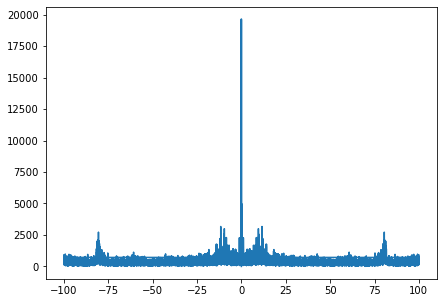

In [22]:
# perform FFT on the reducet Acceleration dataset
acc_red_fft = fftpack.fft(acc_red)
acc_red_fft_pow = np.abs(acc_red_fft)
acc_red_freq = fftpack.fftfreq(acc_red.size, d=1./200)
print(acc_red_freq[acc_red_fft_pow == np.max(acc_red_fft_pow)])
acc_red_fft_ord= pd.Series(np.sort(acc_red_fft_pow), index= acc_red_freq[np.argsort(acc_red_fft_pow)])
print(acc_red_fft_ord)

fig, ax = plt.subplots(figsize=(7,5))
_=ax.plot(acc_red_freq, acc_red_fft_pow)

(3, 12405)
[ 0.70506065  9.63035319 89.66458616]
[[-0.50736976 -0.84677396 -0.15984299]
 [ 0.8390335  -0.5277245   0.13239957]
 [-0.19646557 -0.06693809  0.97822317]]


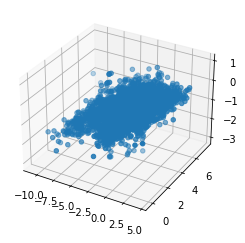

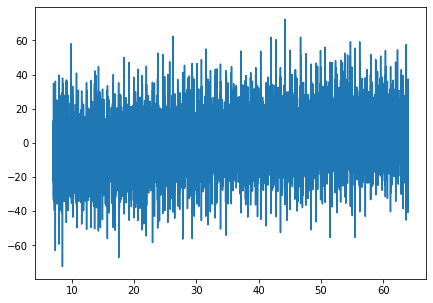

In [23]:
# perform PCA wrt Angular Velocity
gyro = np.array([data_raw.loc[index1:index2]['GyroX'].values.T, data_raw.loc[index1:index2]['GyroY'].values.T, data_raw.loc[index1:index2]['GyroZ'].values.T])
print(acc.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(gyro[0,:], gyro[1,:], gyro[2,:])

U, spectrum, Vt = np.linalg.svd(gyro)
eigs = spectrum ** 2 / (acc.shape[1] - 1)
eigs = np.sort(eigs)
avts = U
for i, line in enumerate(U):
    U[i] = line[np.argsort(eigs)]

eigs_sum = np.sum(eigs)
eigs_frac = np.array([x / eigs_sum for x in eigs])
print(eigs_frac * 100)
print(U)

# we keep the third eigenvector
gyro_red = np.dot(U[:,2].T, acc)
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(data_raw.loc[index1:index2]['Time'], gyro_red)

[ 0.01612253 -0.01612253]
 0.000000     1.106400e-09
-87.916163    2.519717e+01
 87.916163    2.519717e+01
-52.269246    3.467456e+01
 52.269246    3.467456e+01
                  ...     
-97.492946    9.894963e+03
-0.032245     1.590439e+04
 0.032245     1.590439e+04
 0.016123     3.016259e+04
-0.016123     3.016259e+04
Length: 12405, dtype: float64


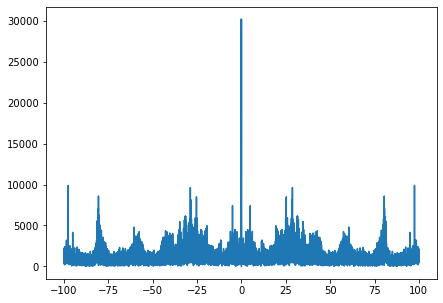

In [24]:
# perform FFT on the reducet Angular Velocity dataset
gyro_red_fft = fftpack.fft(gyro_red)
gyro_red_fft_pow = np.abs(gyro_red_fft)
gyro_red_freq = fftpack.fftfreq(gyro_red.size, d=1./200)
print(gyro_red_freq[gyro_red_fft_pow == np.max(gyro_red_fft_pow)])
gyro_red_fft_ord= pd.Series(np.sort(gyro_red_fft_pow), index= gyro_red_freq[np.argsort(gyro_red_fft_pow)])
print(gyro_red_fft_ord)

fig, ax = plt.subplots(figsize=(7,5))
_=ax.plot(gyro_red_freq, gyro_red_fft_pow)